In [1]:
from openai import OpenAI
import pandas as pd
client = OpenAI()
df = pd.read_csv('sentences.csv')
# Limit the DataFrame to the first 1000 rows
df = df.head(100)

def translate(arb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are an expert in Moroccan Darija dialect and in translating Darija to English." +
             "Purpose of the translation: To study the accuracy of gpt api on Darija translation to English."+
             "Target audience: Darija Computational linguists."
            },
            {"role": "user", "content": "Translate the provided Moroccan Darija dialect sentence into English using sentence-by-sentence translation."             },
            {"role": "assistant", "content": "OK, I understand. I am ready to translate to English."},
            {"role": "user", "content": "هوما مخبّيين شي حاجة, أنا متيقّن!"},
            {"role": "assistant", "content": "They're hiding something, I'm sure!"},
            {"role": "user", "content":  f"{arb}" }
            ], 
        temperature=0.1  # Deterministic responses
        )
    return completion.choices[0].message.content
df['transl'] = df['darija_ar'].apply(translate)

# Display or save the resulting DataFrame
print(df['transl'])

0              They are hiding something, I am certain!
1               Seems like they're trying to stay cool.
2     If they're not showing it, they're definitely ...
3     They will definitely get in trouble because of...
4                          The two of them are arguing!
                            ...                        
95                They're stubborn, his mind is closed.
96                               What's wrong with you?
97      One of you two can discuss this issue with her.
98    She doesn't have enough trust in the relations...
99    Alright, now let's try to discuss it without a...
Name: transl, Length: 100, dtype: object


4 hours for 1000 sentence

'He will cover the expenses until the next three months.', 'We will cover all the material up to next Tuesday', 0.6612762212753296, False


'He started reading early!', 'so start studying soon!', 0.7224154472351074, True

# what could be next? see what's lacking in the ouput in the model's output.

# work on idioms:
# recheck papers for the idioms how they went all the way for a very specific culture or equivalence.

# Prof suggesiton

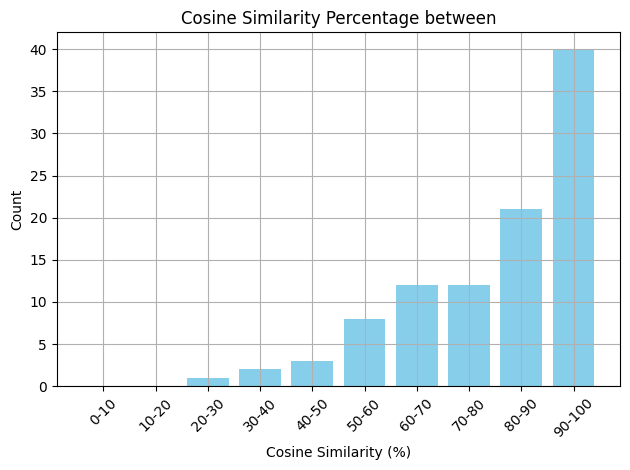

In [5]:
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer, util

# Initialize model
model_name = 'bert-base-nli-mean-tokens'
model = SentenceTransformer(model_name)

# Example data (replace this with your actual DataFrame columns)
transl = df['transl']
eng =  df['eng']

# Function to evaluate pairs and calculate cosine similarities
def evaluate_pairs(transl, eng):
    results = []
    for i in range(len(transl)):
        sentence1, sentence2 = transl[i], eng[i]
        embedding1 = model.encode(sentence1, convert_to_tensor=True)
        embedding2 = model.encode(sentence2, convert_to_tensor=True)
        similarity = util.pytorch_cos_sim(embedding1, embedding2).item()
        results.append((i+2, sentence1, sentence2, similarity))

    return results

# Calculate similarities
similarities = evaluate_pairs(transl, eng)
percentages = [result for *_, result in similarities]

# Define intervals of 10%
intervals = [(i, i+10) for i in range(0, 100, 10)]

# Count similarities in each interval
interval_counts = {interval: 0 for interval in intervals}
for sim in percentages:
    percentage = sim * 100  # Convert cosine similarity to percentage
    for interval in intervals:
        if interval[0] <= percentage < interval[1]:
            interval_counts[interval] += 1
            break

# Prepare data for plotting
labels = [f'{interval[0]}-{interval[1]}' for interval in intervals]
counts = [interval_counts[interval] for interval in intervals]

# Plot bar chart
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Cosine Similarity (%)')
plt.ylabel('Count')
plt.title('Cosine Similarity Percentage between')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()